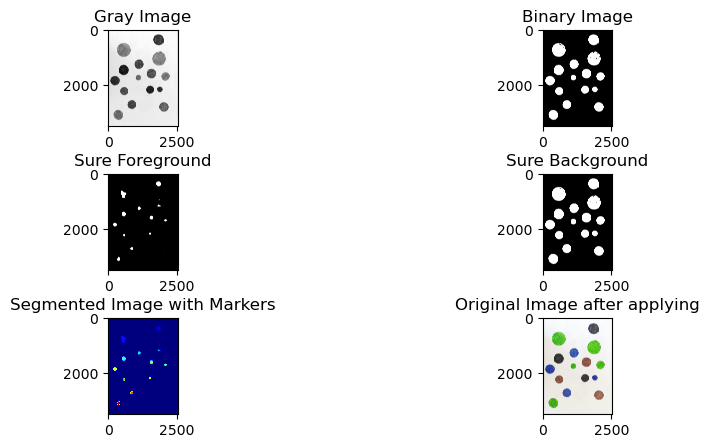

Number of points: 15


In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

# taking the image input
img = cv2.imread('Custom_Image.jpg')

# Converting  the input image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.subplot(3, 5, 1)
plt.imshow(gray, cmap='gray')
plt.title('Gray Image')

# Applying of  thresholding to create a binary image
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Displaying  the binary image
plt.subplot(3, 5, 5)
plt.imshow(binary, cmap='gray')
plt.title('Binary Image')



#opening and dialtion operations
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Applying  the watershed algorithm
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.55* dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)

plt.subplot(3, 5, 6)
plt.imshow(sure_fg, cmap='gray')
plt.title('Sure Foreground')
plt.subplot(3, 5, 10)
plt.imshow(sure_bg, cmap='gray')
plt.title("Sure Background")
# Finding  markers for each point
points, markers = cv2.connectedComponents(sure_fg)


# Displaying  the segmented image with markers
plt.subplot(3, 5, 11)
plt.imshow(markers, cmap='jet')
plt.title('Segmented Image with Markers')


plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.9, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.5)

unknown = cv2.subtract(sure_bg, sure_fg)

markers = markers+1

markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.subplot(3, 5, 15)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image after applying')

plt.show()

print(f'Number of points: {points}')
